In [1]:
import pickle
import pandas as pd
import os
import seaborn
import matplotlib.pyplot as plt

# Load the pickle file
simulation_name = "SEP2"

with open(f"../figures/scenario-properties-{simulation_name}.pkl", "rb") as f:
    scenario_properties = pickle.load(f)

# Quick check: What attributes are available?
print(dir(scenario_properties))
# Define base output path
base_path = f"../figures/{simulation_name}"
os.makedirs(base_path, exist_ok=True)

/opt/anaconda3/envs/opus-env/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


['Dhl', 'Dhu', 'FLM_steps', 'HMid', 'LC', 'R0', 'R0_km', 'R0_rad_km', 'SEP_mapping', 'V', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_collision_pairs', 'add_species_set', 'all_symbolic_vars', 'baseline', 'build_indicator_variables', 'build_model', 'build_model_elliptical', 'build_sym_model', 'calculate_scen_times_dates', 'coll_eqs_lambd', 'collision_pairs', 'cum_CSI', 'debris_length', 'debris_names', 'deltaH', 'density_model', 'drag_term_cur', 'drag_term_upper', 'end_date', 'equations', 'fragment_spreading', 'full_Cdot_PMD', 'full_coll', 'full_drag', 'full_lambda', 'full_lambda_flattened', 'future_launch_model', 'indicator_results', 'indicator_variables', 'indicator_variables_list', 'in

# Launch

In [2]:
scenario_properties.x0.sum().sum()

25383

S_total sum: 65927.0
Su_total sum: 5040
Sns_total sum: 11380
B_total sum: 1171
Overall total: 83518.0


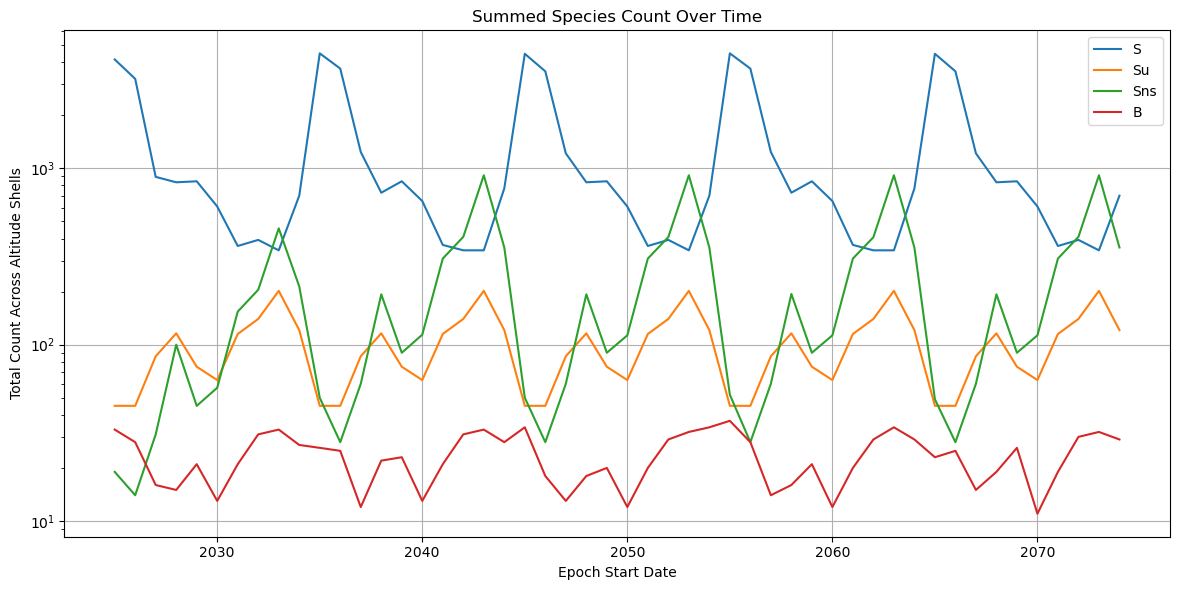

Total launches per species:
Species
B       1171
S      65927
Sns    11380
Su      5040
Name: Launch_Count, dtype: int64


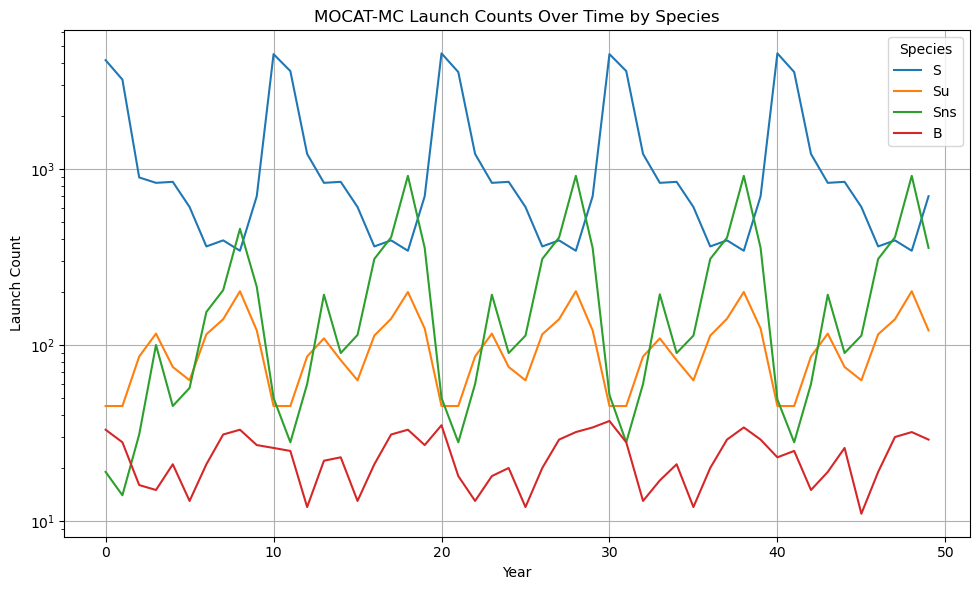

In [3]:
df = scenario_properties.FLM_steps
# Load your DataFrame
df['epoch_start_date'] = pd.to_datetime(df['epoch_start_date'])

# Sum across all alt_bin values (i.e., group by epoch_start_date)
grouped = df.groupby('epoch_start_date').sum(numeric_only=True)

# Identify species columns of interest
s_cols   = [col for col in grouped.columns if col.startswith('S_')]
su_cols  = [col for col in grouped.columns if col.startswith('Su_')]
sns_cols = [col for col in grouped.columns if col.startswith('Sns')]
b_cols = [col for col in grouped.columns if col.startswith('B')]

# Sum within each category
grouped['S_total']   = grouped[s_cols].sum(axis=1)
grouped['Su_total']  = grouped[su_cols].sum(axis=1)
grouped['Sns_total'] = grouped[sns_cols].sum(axis=1)
grouped['B_total'] = grouped[b_cols].sum(axis=1)

print("S_total sum:", grouped['S_total'].sum())
print("Su_total sum:", grouped['Su_total'].sum())
print("Sns_total sum:", grouped['Sns_total'].sum())
print("B_total sum:", grouped['B_total'].sum())
print("Overall total:", grouped[['S_total', 'Su_total', 'Sns_total', 'B_total']].sum().sum())

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped['S_total'], label='S')
plt.plot(grouped.index, grouped['Su_total'], label='Su')
plt.plot(grouped.index, grouped['Sns_total'], label='Sns')
plt.plot(grouped.index, grouped['B_total'], label='B')


plt.xlabel('Epoch Start Date')
plt.ylabel('Total Count Across Altitude Shells')
plt.title('Summed Species Count Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.yscale('log')
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
file = '/Users/indigobrownhall/Code/MOCAT-VnV/yearly_launch_counts_SEP2.csv'
df = pd.read_csv(file)

# Calculate and print total launches per species
total_launches = df.groupby('Species')['Launch_Count'].sum()
print("Total launches per species:")
print(total_launches)

# Pivot the data to get Years as index and each Species as a column
pivot_df = df.pivot(index='Year', columns='Species', values='Launch_Count').fillna(0)

# Plot
plt.figure(figsize=(10, 6))
for species in ['S', 'Su', 'Sns', 'B']:
    if species in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[species], label=species)

plt.title("MOCAT-MC Launch Counts Over Time by Species")
plt.xlabel("Year")
plt.ylabel("Launch Count")
plt.legend(title="Species")
plt.grid(True)
plt.tight_layout()
plt.yscale('log')
plt.show()

Total launches per species:
Species
B       1171
S      65927
Sns    11380
Su      5040
Name: Launch_Count, dtype: int64


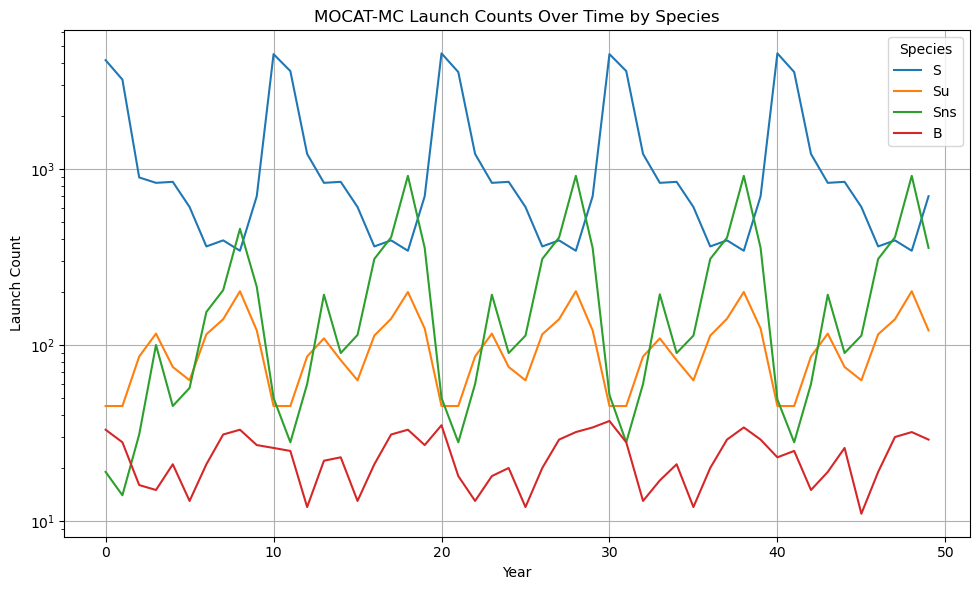

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
file = '/Users/indigobrownhall/Code/MOCAT-VnV/yearly_launch_counts_SEP2.csv'
df = pd.read_csv(file)

# Calculate and print total launches per species
total_launches = df.groupby('Species')['Launch_Count'].sum()
print("Total launches per species:")
print(total_launches)

# Pivot the data to get Years as index and each Species as a column
pivot_df = df.pivot(index='Year', columns='Species', values='Launch_Count').fillna(0)

# Plot
plt.figure(figsize=(10, 6))
for species in ['S', 'Su', 'Sns', 'B']:
    if species in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[species], label=species)

plt.title("MOCAT-MC Launch Counts Over Time by Species")
plt.xlabel("Year")
plt.ylabel("Launch Count")
plt.legend(title="Species")
plt.grid(True)
plt.tight_layout()
plt.yscale('log')
plt.show()

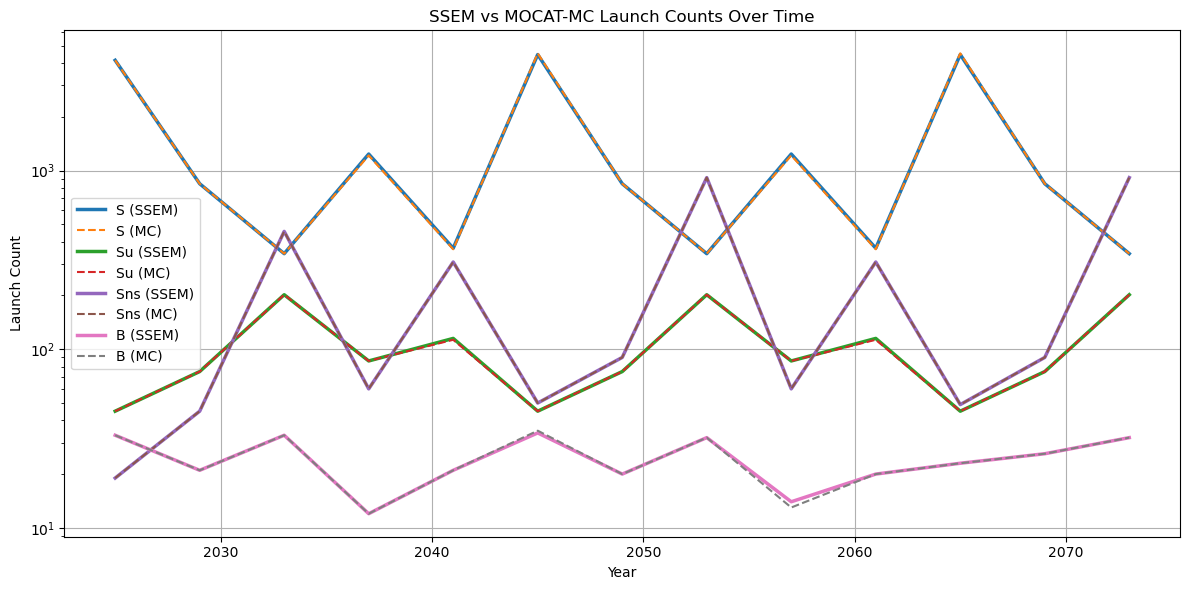

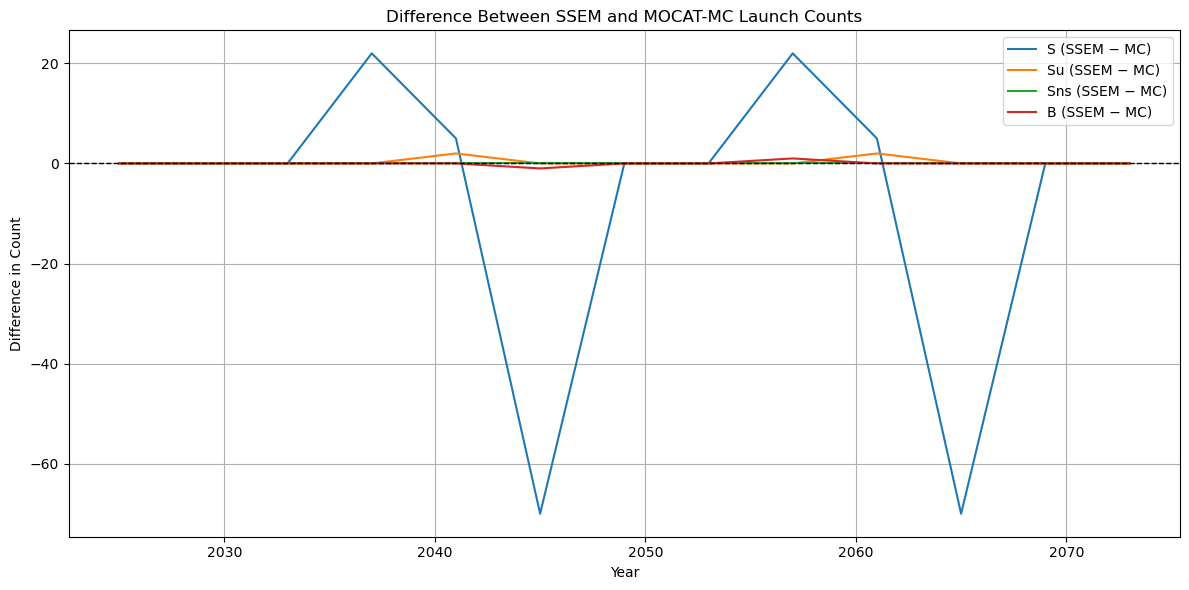

🧮 Final cumulative difference for S: -86
🧮 Final cumulative difference for Su: +4
🧮 Final cumulative difference for Sns: +0
🧮 Final cumulative difference for B: +0


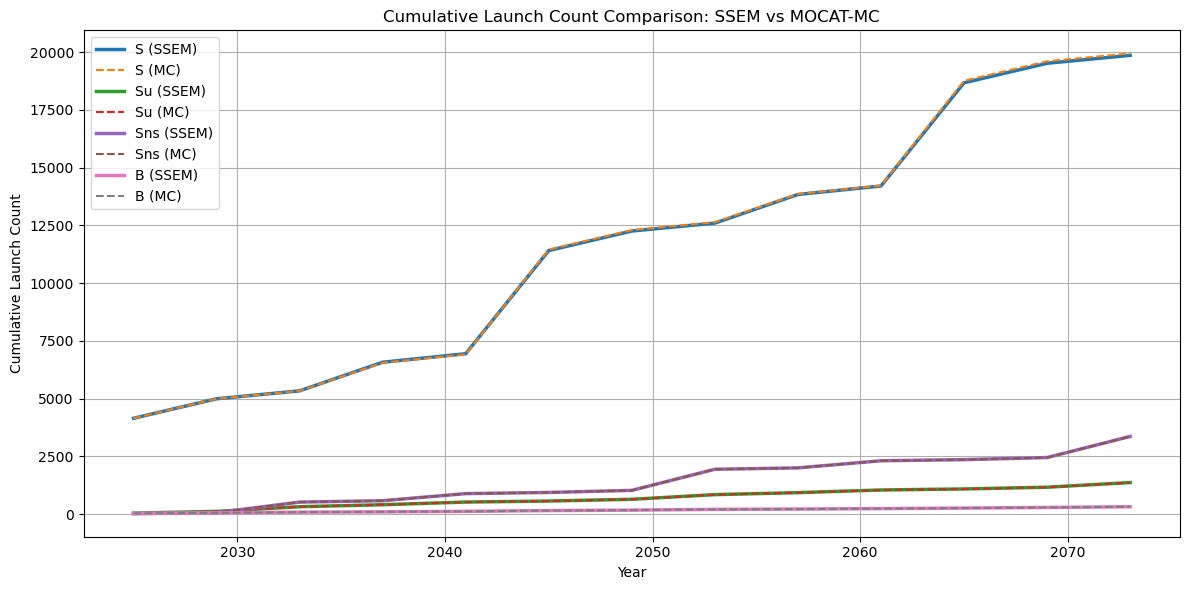

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load MOCAT-MC Data ===
mc_file = '/Users/indigobrownhall/Code/MOCAT-VnV/yearly_launch_counts_SEP2.csv'
df_mc = pd.read_csv(mc_file)

# Offset MC years to actual calendar years
df_mc['Year'] = df_mc['Year'] + 2025

# Now pivot and parse to datetime
pivot_mc = df_mc.pivot(index='Year', columns='Species', values='Launch_Count').fillna(0)
pivot_mc.index = pd.to_datetime(pivot_mc.index, format='%Y')

# Convert Year to datetime for alignment
pivot_mc.index = pd.to_datetime(pivot_mc.index, format='%Y')

# === Reindex SSEM results to match MC for comparison ===
grouped_trimmed = grouped.copy()
grouped_trimmed.index = pd.to_datetime(grouped_trimmed.index)
common_years = pivot_mc.index.intersection(grouped_trimmed.index)
ssem_plot = grouped_trimmed.loc[common_years]
mc_plot = pivot_mc.loc[common_years]

# === Plot 1: Combined plot ===
plt.figure(figsize=(12, 6))
species_list = ['S', 'Su', 'Sns', 'B']
for sp in species_list:
    if f'{sp}_total' in ssem_plot.columns and sp in mc_plot.columns:
        plt.plot(ssem_plot.index, ssem_plot[f'{sp}_total'], label=f'{sp} (SSEM)', linewidth=2.5)
        plt.plot(mc_plot.index, mc_plot[sp], '--', label=f'{sp} (MC)', linewidth=1.5)

plt.title("SSEM vs MOCAT-MC Launch Counts Over Time")
plt.xlabel("Year")
plt.ylabel("Launch Count")
plt.legend()
plt.grid(True)
plt.yscale("log")
plt.tight_layout()
plt.show()

# === Plot 2: Difference Plot (SSEM - MC) ===
plt.figure(figsize=(12, 6))
for sp in species_list:
    if f'{sp}_total' in ssem_plot.columns and sp in mc_plot.columns:
        difference = ssem_plot[f'{sp}_total'] - mc_plot[sp]
        plt.plot(common_years, difference, label=f"{sp} (SSEM − MC)")

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Difference Between SSEM and MOCAT-MC Launch Counts")
plt.xlabel("Year")
plt.ylabel("Difference in Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot 3: Cumulative Launch Counts ===
plt.figure(figsize=(12, 6))
for sp in species_list:
    if f'{sp}_total' in ssem_plot.columns and sp in mc_plot.columns:
        ssem_cumsum = ssem_plot[f'{sp}_total'].cumsum()
        mc_cumsum = mc_plot[sp].cumsum()

        plt.plot(ssem_plot.index, ssem_cumsum, label=f'{sp} (SSEM)', linewidth=2.5)
        plt.plot(mc_plot.index, mc_cumsum, '--', label=f'{sp} (MC)', linewidth=1.5)

        # Print final cumulative difference
        final_diff = ssem_cumsum.iloc[-1] - mc_cumsum.iloc[-1]
        print(f"🧮 Final cumulative difference for {sp}: {final_diff:+,.0f}")

plt.title("Cumulative Launch Count Comparison: SSEM vs MOCAT-MC")
plt.xlabel("Year")
plt.ylabel("Cumulative Launch Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

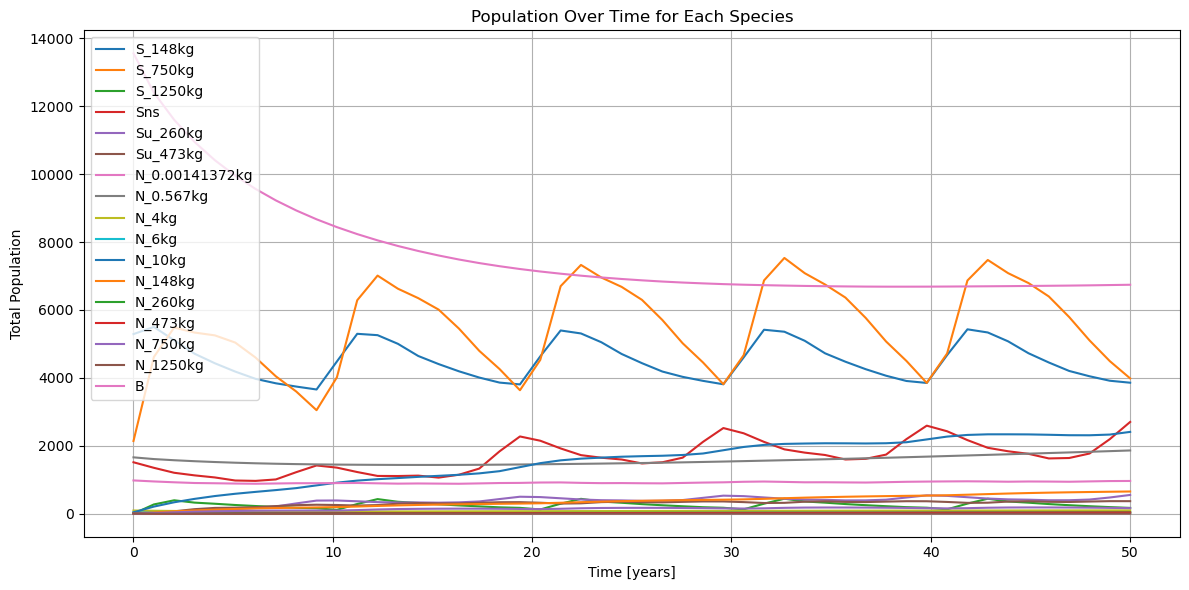

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Time array (in seconds) → convert to years for plot
times = scenario_properties.scen_times

# Species and shell info
species = scenario_properties.species_names
n_shells = scenario_properties.n_shells
y = scenario_properties.output.y  # shape: [n_species * n_shells, n_times]

# Plot total population over time for each species
plt.figure(figsize=(12, 6))

for i, sp in enumerate(species):
    start = i * n_shells
    end = (i + 1) * n_shells
    pop_total = y[start:end, :].sum(axis=0)  # sum over shells

    plt.plot(times, pop_total, label=sp)

plt.xlabel("Time [years]")
plt.ylabel("Total Population")
plt.title("Population Over Time for Each Species")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

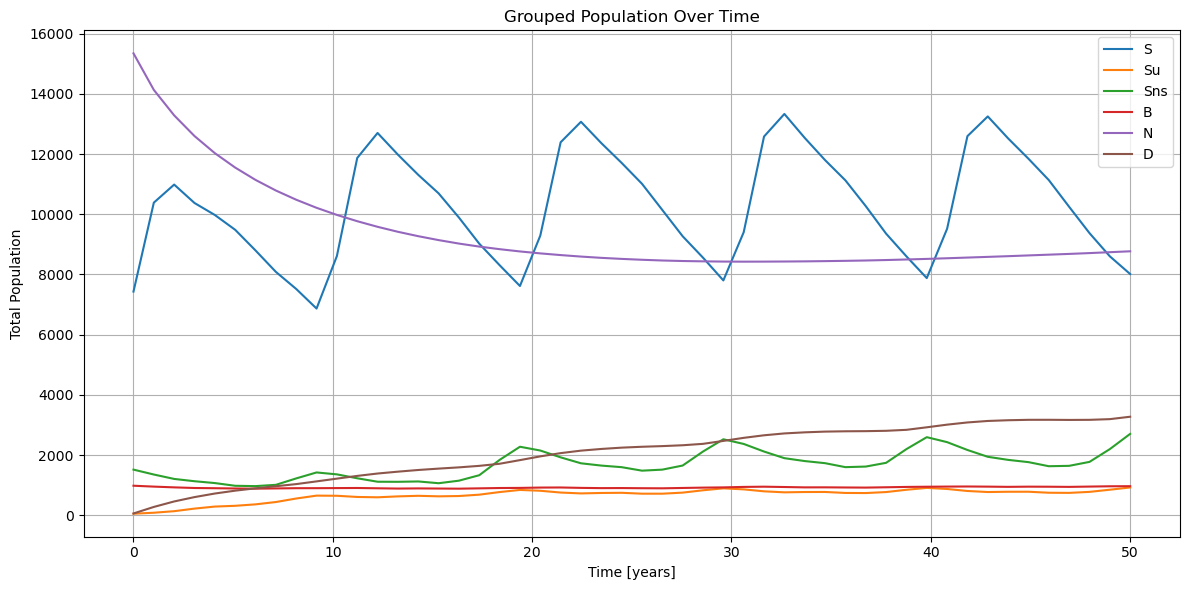

Saved population data to ../figures/SEP2/pop_time.csv


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Time array (seconds → years)
times = scenario_properties.scen_times
species = scenario_properties.species_names
n_shells = scenario_properties.n_shells
y = scenario_properties.output.y

# Define fragment mass species for D group
large_fragments = ['N_10kg', 'N_148kg', 'N_260kg', 'N_472kg', 'N_750kg', 'N_1250kg']

# Initialize grouped data
group_pop = {
    'S': np.zeros_like(times),
    'Su': np.zeros_like(times),
    'Sns': np.zeros_like(times),
    'B': np.zeros_like(times),
    'N': np.zeros_like(times),
    'D': np.zeros_like(times)
}

# Classify each species
for i, sp in enumerate(species):
    start = i * n_shells
    end = (i + 1) * n_shells
    pop_total = y[start:end, :].sum(axis=0)

    if sp.startswith('Sns'):
        group_pop['Sns'] += pop_total
    elif sp.startswith('Su'):
        group_pop['Su'] += pop_total
    elif sp.startswith('S'):
        group_pop['S'] += pop_total
    elif sp == 'B':
        group_pop['B'] += pop_total
    elif sp in large_fragments:
        group_pop['D'] += pop_total
    elif sp.startswith('N'):
        group_pop['N'] += pop_total
    # else: ignore

# Plotting
plt.figure(figsize=(12, 6))
for group, pop in group_pop.items():
    plt.plot(times, pop, label=group)

plt.xlabel("Time [years]")
plt.ylabel("Total Population")
plt.title("Grouped Population Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

import pandas as pd

# Convert start_date to datetime if it's a string
start_year = pd.to_datetime(scenario_properties.start_date).year

# Build tidy DataFrame
rows = []
for species, pop_series in group_pop.items():
    for t_idx, pop in enumerate(pop_series):
        year = int(start_year + times[t_idx])
        rows.append({
            "Species": species,
            "Population": pop,
            "Year": year
        })

# Create DataFrame
df_grouped = pd.DataFrame(rows)

# Optional: sort by year and species
df_grouped = df_grouped.sort_values(["Species", "Year"]).reset_index(drop=True)

# Save grouped population DataFrame to CSV
csv_path = os.path.join(base_path, "pop_time.csv")
df_grouped.to_csv(csv_path, index=False)

print(f"Saved population data to {csv_path}")

Saved shell-resolved population data to ../figures/SEP2/pop_time_alt.csv


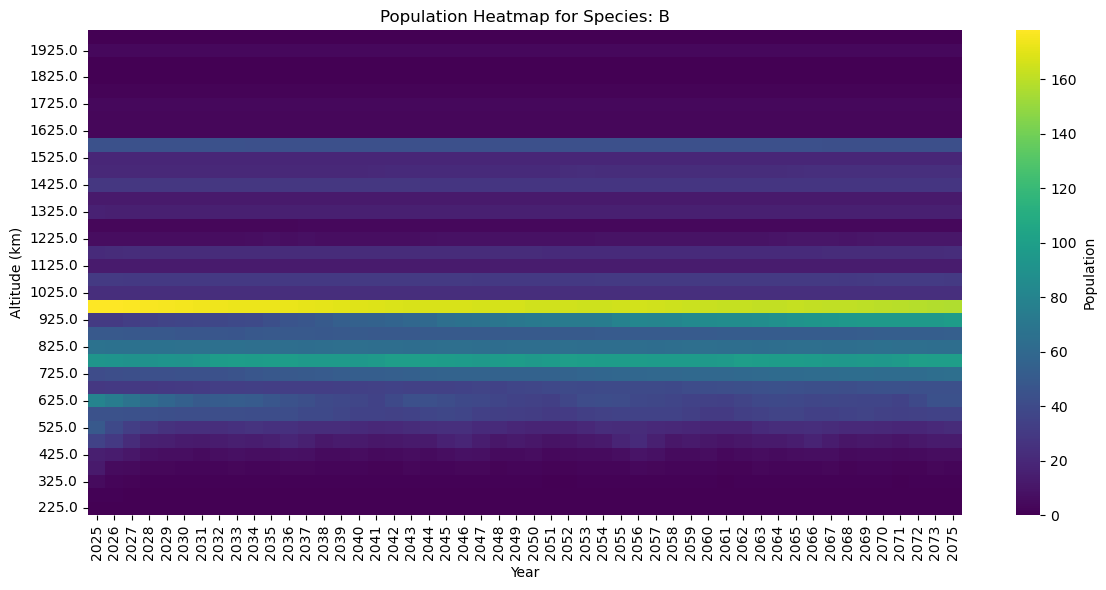

Saved heatmap for B to ../figures/SEP2/heatmaps/B_heatmap.png


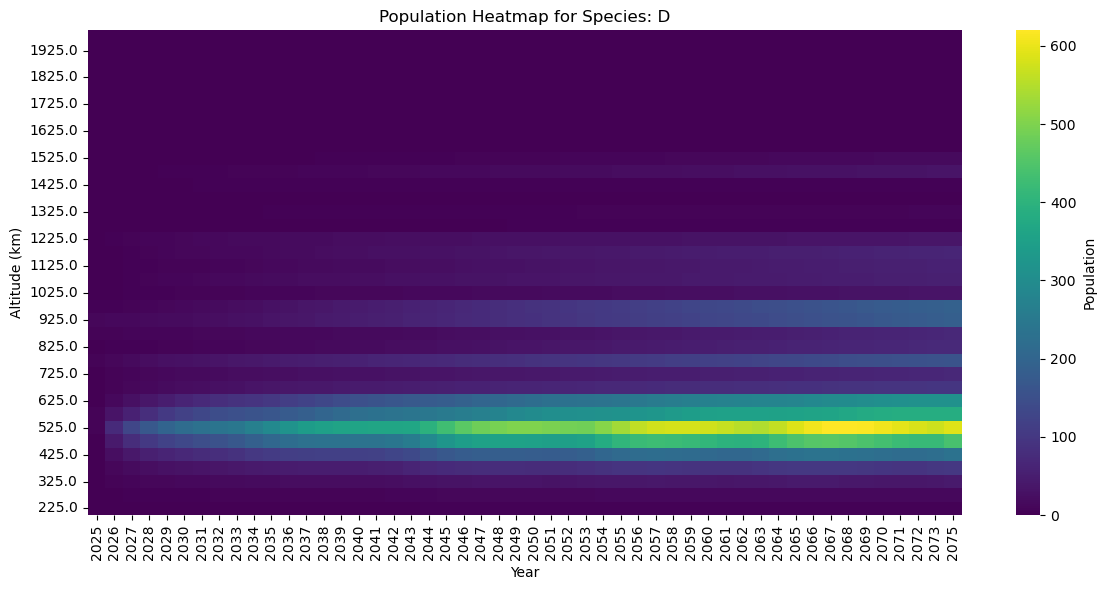

Saved heatmap for D to ../figures/SEP2/heatmaps/D_heatmap.png


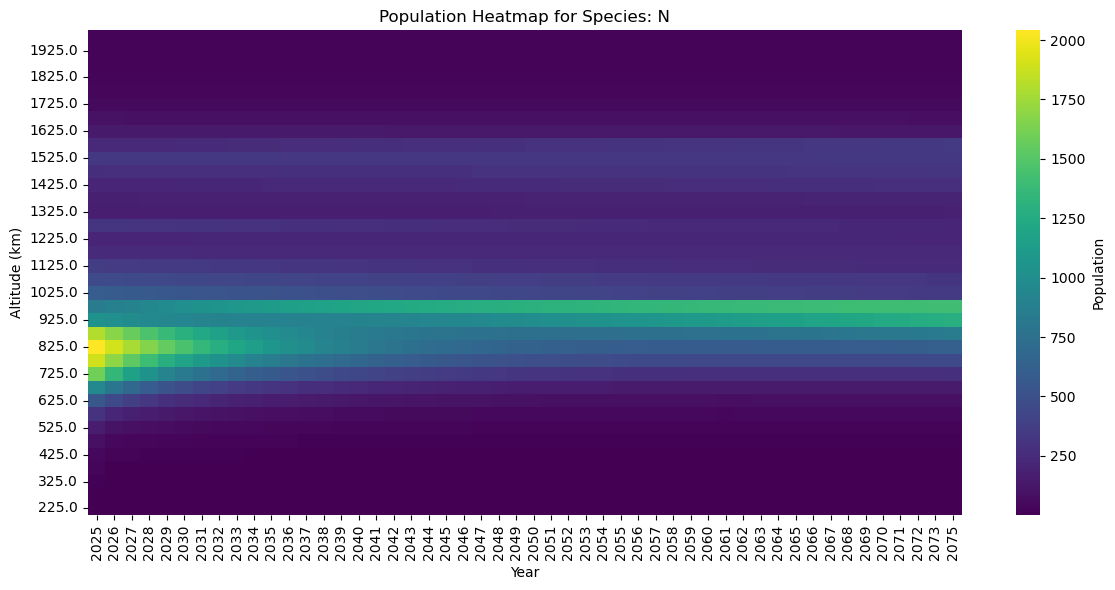

Saved heatmap for N to ../figures/SEP2/heatmaps/N_heatmap.png


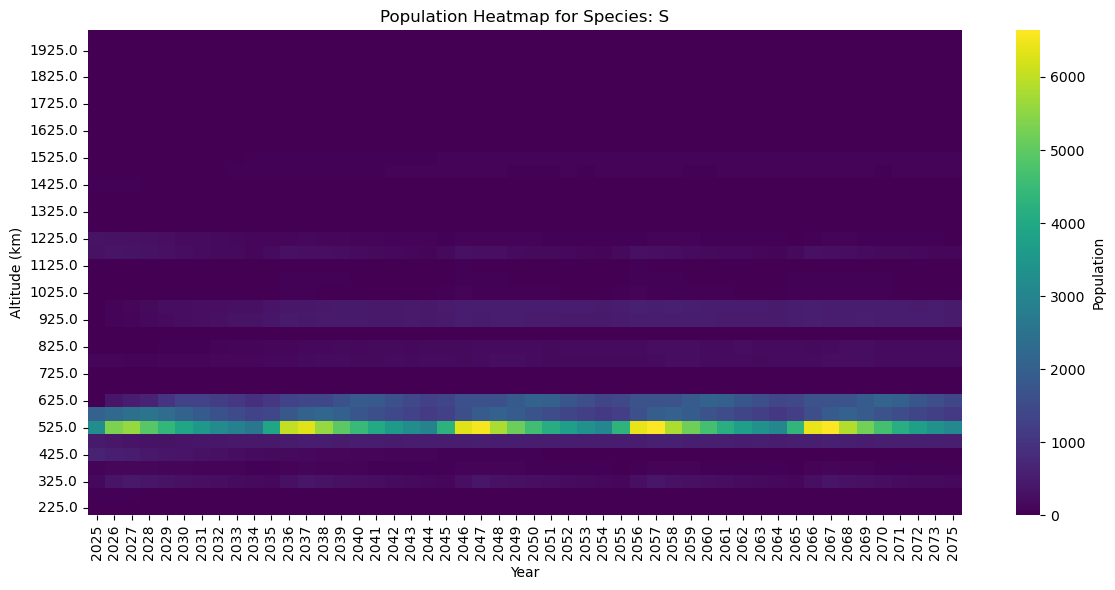

Saved heatmap for S to ../figures/SEP2/heatmaps/S_heatmap.png


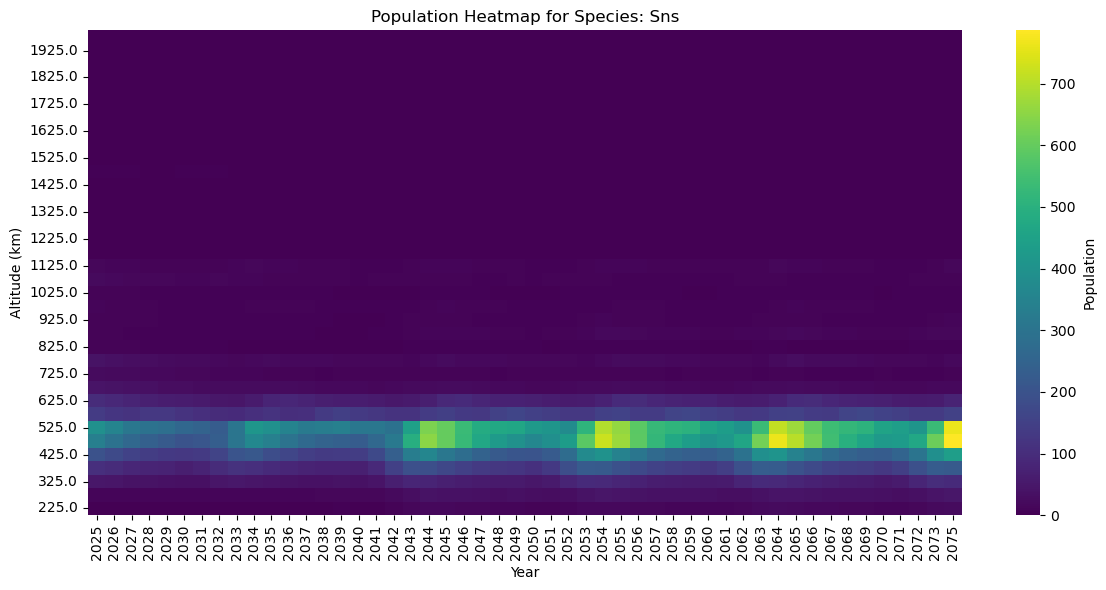

Saved heatmap for Sns to ../figures/SEP2/heatmaps/Sns_heatmap.png


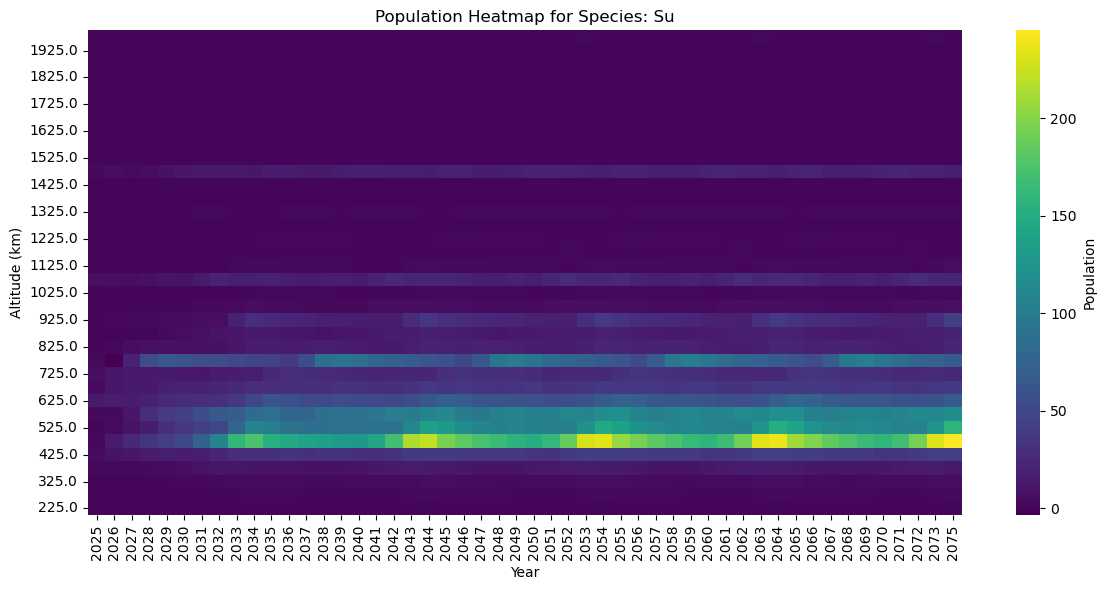

Saved heatmap for Su to ../figures/SEP2/heatmaps/Su_heatmap.png


In [8]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Setup ---
rows_alt = []

Hmid = scenario_properties.HMid  # [n_shells] – altitude midpoints
start_year = pd.to_datetime(scenario_properties.start_date).year
species = scenario_properties.species_names
n_shells = scenario_properties.n_shells
times = scenario_properties.scen_times
y = scenario_properties.output.y

for i, sp in enumerate(species):
    if (
        sp.startswith('S') or sp.startswith('Su') or sp.startswith('Sns') or
        sp.startswith('N') or sp == 'B'
    ):
        group_label = (
            'Sns' if sp.startswith('Sns') else
            'Su' if sp.startswith('Su') else
            'S' if sp.startswith('S') and not sp.startswith('Su') and not sp.startswith('Sns') else
            'B' if sp == 'B' else
            'D' if sp in large_fragments else
            'N'
        )

        start_idx = i * n_shells
        end_idx = (i + 1) * n_shells
        if end_idx > y.shape[0]:
            continue  # prevent out-of-bounds error

        shell_data = y[start_idx:end_idx, :]  # shape [n_shells, time]

        rows_temp = []
        for shell_idx in range(n_shells):
            altitude = Hmid[shell_idx]
            for t_idx, year_offset in enumerate(times):
                year = int(start_year + year_offset)
                population = shell_data[shell_idx, t_idx]
                rows_temp.append({
                    "Species": group_label,
                    "Population": population,
                    "Year": year,
                    "Altitude": altitude
                })

        df_temp = pd.DataFrame(rows_temp)
        rows_alt.append(df_temp)

# --- Final aggregation ---
df_grouped_alt = pd.concat(rows_alt, ignore_index=True)

# Now group by Species-Year-Altitude to remove any duplicates
df_grouped_alt = df_grouped_alt.groupby(["Species", "Year", "Altitude"], as_index=False).sum()
df_grouped_alt = df_grouped_alt.sort_values(["Species", "Year", "Altitude"]).reset_index(drop=True)

# --- Save CSV ---
csv_path_alt = os.path.join(base_path, "pop_time_alt.csv")
df_grouped_alt.to_csv(csv_path_alt, index=False)
print(f"Saved shell-resolved population data to {csv_path_alt}")

df_grouped_alt.duplicated().value_counts()

# --- Heatmaps ---
heatmap_dir = os.path.join(base_path, "heatmaps")
os.makedirs(heatmap_dir, exist_ok=True)

species_list = df_grouped_alt["Species"].unique()

for sp in species_list:
    df_sp = df_grouped_alt[df_grouped_alt["Species"] == sp]

    pivot_table = df_sp.pivot_table(
        index="Altitude",
        columns="Year",
        values="Population",
        aggfunc="sum",
        fill_value=0
    )

    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_table, cmap="viridis", cbar_kws={'label': 'Population'})
    plt.gca().invert_yaxis()
    plt.title(f"Population Heatmap for Species: {sp}")
    plt.xlabel("Year")
    plt.ylabel("Altitude (km)")
    plt.tight_layout()

    fig_path = os.path.join(heatmap_dir, f"{sp}_heatmap.png")
    plt.savefig(fig_path, dpi=300)
    plt.show()
    # plt.close()

    print(f"Saved heatmap for {sp} to {fig_path}")

✅ Saved bar chart snapshot to ../figures/SEP2/pop_snapshot_bar.png


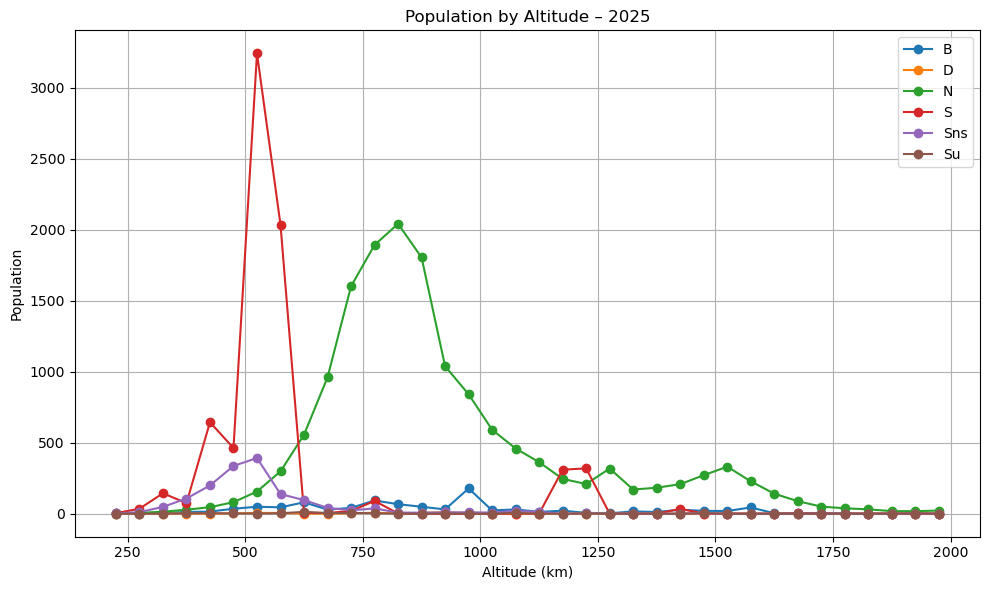

✅ Saved fixed continuous line plot for 2025 to ../figures/SEP2/snapshots_altitude_lines/pop_by_altitude_2025.png


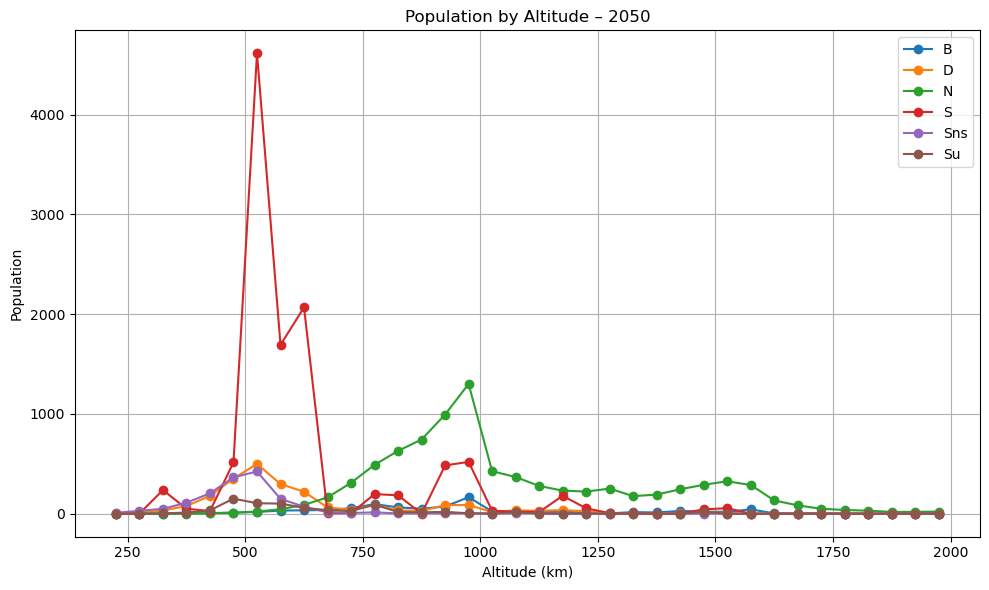

✅ Saved fixed continuous line plot for 2050 to ../figures/SEP2/snapshots_altitude_lines/pop_by_altitude_2050.png


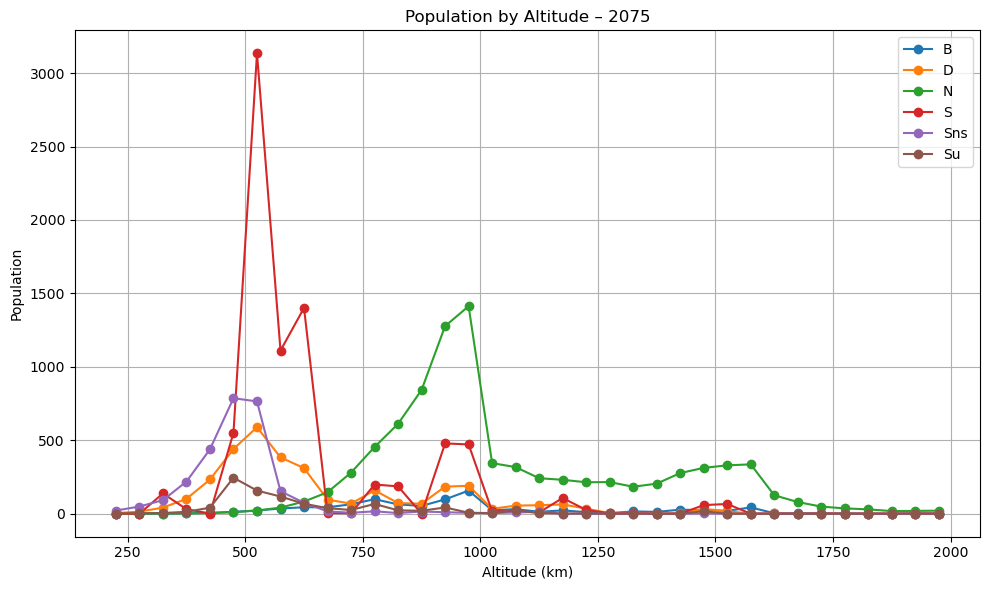

✅ Saved fixed continuous line plot for 2075 to ../figures/SEP2/snapshots_altitude_lines/pop_by_altitude_2075.png


/var/folders/s7/wvhpsthj2y93nhzxmj7x1zw80000gn/T/ipykernel_99271/1101480586.py:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


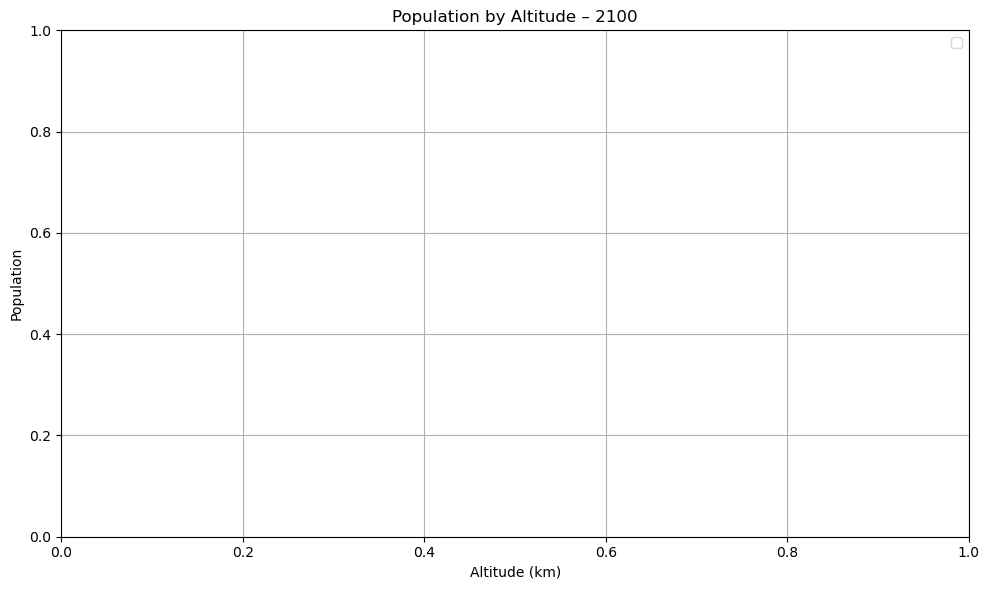

✅ Saved fixed continuous line plot for 2100 to ../figures/SEP2/snapshots_altitude_lines/pop_by_altitude_2100.png


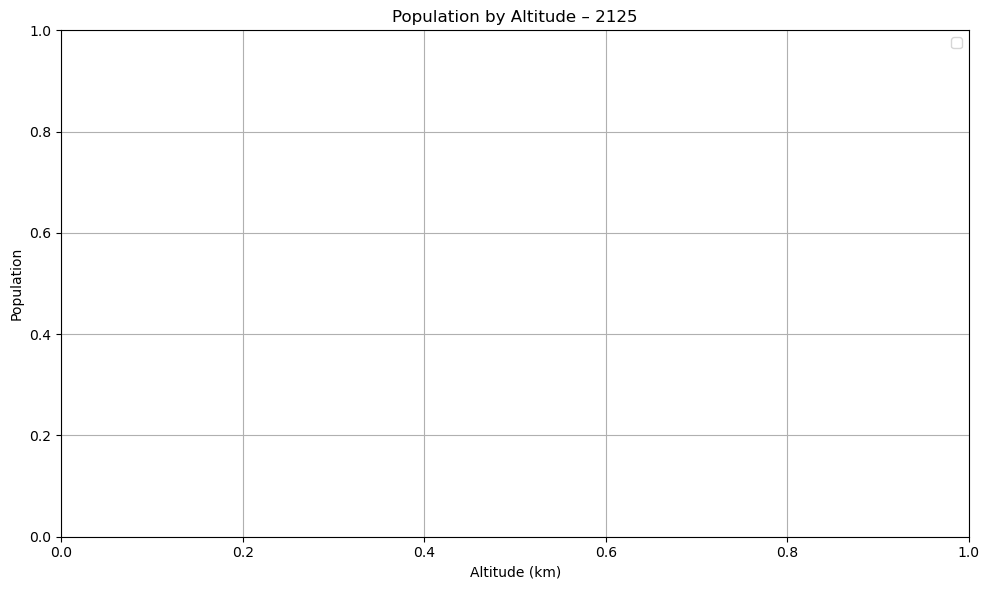

✅ Saved fixed continuous line plot for 2125 to ../figures/SEP2/snapshots_altitude_lines/pop_by_altitude_2125.png
✅ Saved snapshot data to ../figures/SEP2/pop_snapshots.csv


In [9]:
snapshot_years = [2025, 2050, 2075, 2100, 2125]
csv_path_alt = os.path.join(base_path, "pop_time_alt.csv")
df_grouped_alt = pd.read_csv(csv_path_alt)
line_plot_dir = os.path.join(base_path, "snapshots_altitude_lines")
os.makedirs(line_plot_dir, exist_ok=True)

# --- FILTER SNAPSHOT YEARS ---
df_snapshots = df_grouped_alt[df_grouped_alt["Year"].isin(snapshot_years)]

# --- 1. BAR CHART: Total Population per Species at Snapshots ---
bar_data = (
    df_snapshots
    .groupby(["Year", "Species"])["Population"]
    .sum()
    .unstack(fill_value=0)
)

bar_data.plot(kind="bar", figsize=(10, 6))
plt.ylabel("Total Population")
plt.title("Snapshot: Total Population per Species")
plt.xticks(rotation=0)
plt.tight_layout()

bar_plot_path = os.path.join(base_path, "pop_snapshot_bar.png")
plt.savefig(bar_plot_path, dpi=300)
plt.close()
print(f"✅ Saved bar chart snapshot to {bar_plot_path}")

# --- 2. LINE PLOTS: Population by Altitude per Year ---
# --- 2. FIXED LINE PLOTS: Continuous Altitude vs Population (scatter+lines) ---

from itertools import product

for year in snapshot_years:
    plt.figure(figsize=(10, 6))
    df_year = df_snapshots[df_snapshots["Year"] == year]

    altitudes = sorted(df_year["Altitude"].unique())
    species_list = sorted(df_year["Species"].unique())

    for species in species_list:
        # Group by altitude first to avoid duplicates
        df_species = (
            df_year[df_year["Species"] == species]
            .groupby("Altitude", as_index=False)["Population"]
            .sum()
        )

        # Reindex to ensure all altitudes are present (fill missing with 0)
        df_species = df_species.set_index("Altitude").reindex(altitudes, fill_value=0).reset_index()

        # Plot
        plt.plot(
            df_species["Altitude"],
            df_species["Population"],
            label=species,
            marker='o',
            linestyle='-'
        )

    plt.title(f"Population by Altitude – {year}")
    plt.xlabel("Altitude (km)")
    plt.ylabel("Population")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    line_path = os.path.join(line_plot_dir, f"pop_by_altitude_{year}.png")
    plt.savefig(line_path, dpi=300)
    plt.show()

    print(f"✅ Saved fixed continuous line plot for {year} to {line_path}")

# --- 3. SAVE SNAPSHOT DATA ---
csv_snap_path = os.path.join(base_path, "pop_snapshots.csv")
df_snapshots.to_csv(csv_snap_path, index=False)
print(f"✅ Saved snapshot data to {csv_snap_path}")


In [ ]:
# import os
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # === CONFIG ===
# snapshot_indices = [0, 25, 50, 75, 99]
# snapshot_years = [2025 + i for i in snapshot_indices]

# # === GET ALTITUDES, SPECIES NAMES AND POPULATION MATRIX ===
# altitudes = scenario_properties.HMid  # shape: [n_shells]
# y = scenario_properties.output.y      # shape: [n_species * n_shells, n_times]
# n_shells = scenario_properties.n_shells
# species_names = scenario_properties.species_names

# # === FUNCTION TO MAP SUBSPECIES TO GROUPS ===
# def map_species_to_group(name):
    
#     if name in large_fragments:
#         return 'D'
#     if name.startswith('Sns'):
#         return 'Sns'
#     elif name.startswith('Su'):
#         return 'Su'
#     elif name.startswith('S'):
#         return 'S'
#     elif name == 'B':
#         return 'B'
#     else:
#         return 'N'

# # === COLLECT SNAPSHOT DATA ===
# rows = []

# for i, name in enumerate(species_names):
#     group = map_species_to_group(name)
#     shell_data = y[i * n_shells : (i + 1) * n_shells, :]  # [n_shells, n_times]

#     for snap_idx, year in zip(snapshot_indices, snapshot_years):
#         for shell_idx in range(n_shells):
#             population = shell_data[shell_idx, snap_idx]
#             rows.append({
#                 "Species": group,
#                 "Year": year,
#                 "Altitude": altitudes[shell_idx],
#                 "Population": population
#             })

# # === CREATE DATAFRAME ===
# df_snapshots = pd.DataFrame(rows)
# df_snapshots = df_snapshots.groupby(["Species", "Year", "Altitude"], as_index=False)["Population"].sum()

# # === SAVE TO CSV ===
# csv_path = os.path.join(base_path, "snapshot_density_altitude.csv")
# df_snapshots.to_csv(csv_path, index=False)
# print(f"✅ Saved snapshot density data to {csv_path}")

# # === PLOT PER-YEAR ALTITUDE LINES ===
# for year in snapshot_years:
#     plt.figure(figsize=(10, 6))
#     df_year = df_snapshots[df_snapshots["Year"] == year]
#     altitudes_sorted = sorted(df_year["Altitude"].unique())
#     species_list = sorted(df_year["Species"].unique())

#     for species in species_list:
#         df_species = (
#             df_year[df_year["Species"] == species]
#             .groupby("Altitude", as_index=False)["Population"]
#             .sum()
#             .set_index("Altitude")
#             .reindex(altitudes_sorted, fill_value=0)
#             .reset_index()
#         )
#         plt.plot(df_species["Altitude"], df_species["Population"], label=species, marker='o')

#     plt.title(f"Population by Altitude – {year}")
#     plt.xlabel("Altitude (km)")
#     plt.ylabel("Population")
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()

#     fig_path = os.path.join(base_path, f"pop_by_altitude_{year}.png")
#     plt.savefig(fig_path, dpi=300)
#     plt.show()
#     print(f"✅ Saved plot for {year} to {fig_path}")

IndexError: index 50 is out of bounds for axis 1 with size 50

In [11]:
import numpy as np
import matplotlib.pyplot as plt

print("Generating cumulative indicator line plot...")

# Extract first indicator only
first_indicator_name = list(scenario_properties.indicator_results['indicators'].keys())[-1]
first_indicator_data = scenario_properties.indicator_results['indicators'][first_indicator_name]

# Extract time and indicator values
times = np.array(list(first_indicator_data.keys()))
indicator_matrix = np.array([np.squeeze(values) for values in first_indicator_data.values()])  # shape: [num_times, num_shells]

# Cumulative sum over time (sum across shells first)
indicator_total_per_timestep = np.sum(indicator_matrix, axis=1)
cumulative_indicator = np.cumsum(indicator_total_per_timestep)

# Plot cumulative total
plt.figure(figsize=(10, 5))
plt.plot(times, cumulative_indicator, marker='o')
plt.xlabel("Time")
plt.ylabel("Cumulative Indicator Value")
plt.title(f"Cumulative Indicator: {first_indicator_name}")
plt.grid(True)
plt.tight_layout()
plt.show()

Generating cumulative indicator line plot...


IndexError: list index out of range

Generating corrected cumulative aggregate collision plot (by prefix)...


ValueError: x, y, and format string must not be None

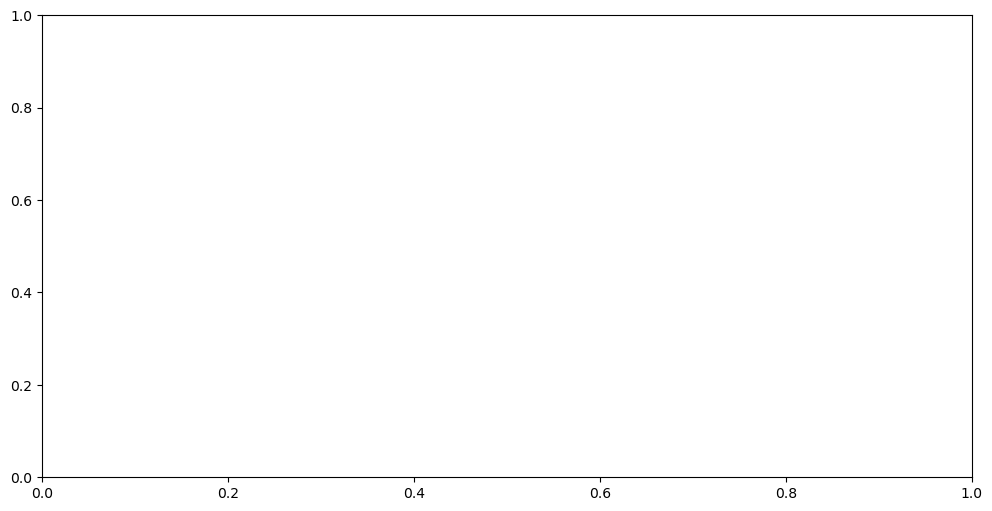

In [12]:
import numpy as np
import matplotlib.pyplot as plt

print("Generating corrected cumulative aggregate collision plot (by prefix)...")

# Step 1: Filter relevant indicators
indicators = {
    name: data
    for name, data in scenario_properties.indicator_results['indicators'].items()
    if name.endswith('aggregate_collisions') and name != 'active_aggregate_collisions'
}

# Step 2: Initialize raw per-timestep sum arrays by prefix
sum_by_prefix = {'N': None, 'S': None, 'B': None}
times = None

# Step 3: Loop through indicators and assign to prefix buckets
for name, time_values in indicators.items():
    prefix = name.split('_')[0]
    if prefix not in sum_by_prefix:
        continue  # skip unknown prefixes

    times = np.array(list(time_values.keys()))
    matrix = np.array([np.squeeze(values) for values in time_values.values()])  # [num_times, num_shells]
    per_timestep_sum = np.sum(matrix, axis=1)

    if sum_by_prefix[prefix] is None:
        sum_by_prefix[prefix] = per_timestep_sum
    else:
        sum_by_prefix[prefix] += per_timestep_sum

# Step 4: Compute total from known prefixes
total_sum = np.zeros_like(times, dtype=float)
for v in sum_by_prefix.values():
    if v is not None:
        total_sum += v

# # Step 5: Compute cumulative sums
total_cumulative = np.cumsum(total_sum)
cumulative_by_prefix = {
    prefix: np.cumsum(val) if val is not None else None
    for prefix, val in sum_by_prefix.items()
}

# Step 6: Plot
plt.figure(figsize=(12, 6))
plt.plot(times, total_cumulative, label='Total Collisions', color='black', linewidth=2)

for prefix, cumulative in cumulative_by_prefix.items():
    if cumulative is not None:
        label = {'N': 'Debris (N)', 'S': 'Satellites (S)', 'B': 'Rocket Bodies (B)'}.get(prefix, prefix)
        plt.plot(times, cumulative, label=label)

plt.xlabel("Time")
plt.ylabel("Cumulative Collisions")
plt.title("Cumulative Aggregate Collisions by Class (N, S, B)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Use raw sums instead of cumulative
# (no np.cumsum used here)
# raw_by_prefix = sum_by_prefix

# # Step 6: Plot non-cumulative (raw) collisions
# plt.figure(figsize=(12, 6))
# plt.plot(times, total_sum, label='Total Collisions', color='black', linewidth=2)

# for prefix, values in raw_by_prefix.items():
#     if values is not None:
#         label = {'N': 'Debris (N)', 'S': 'Satellites (S)', 'B': 'Rocket Bodies (B)'}.get(prefix, prefix)
#         plt.plot(times, values, label=label)

# plt.xlabel("Time")
# plt.ylabel("Annual Collisions")
# plt.title("Annual Aggregate Collisions by Class (N, S, B)")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

/var/folders/s7/wvhpsthj2y93nhzxmj7x1zw80000gn/T/ipykernel_99271/3342502006.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


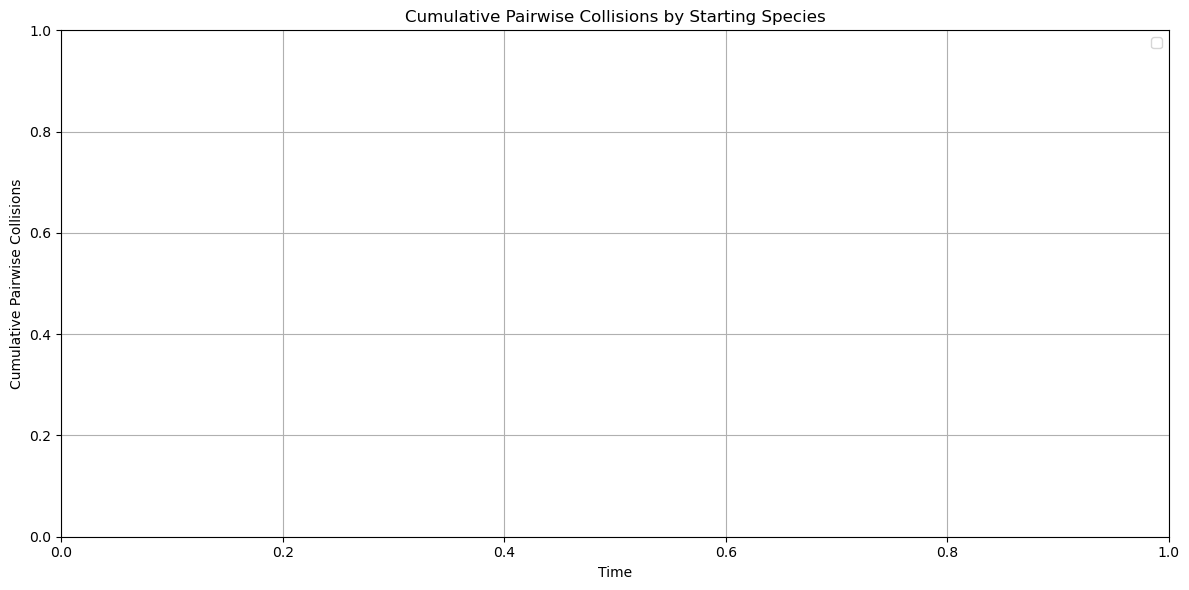

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Filter for indicators containing 'pair_collisions'
pairwise_indicators = {
    name: data
    for name, data in scenario_properties.indicator_results['indicators'].items()
    if 'pair_collisions' in name
}

# Step 2: Define all relevant prefixes
prefixes = ['N', 'S', 'Su', 'Sns', 'B']

# Step 3: Initialize a dictionary to store cumulative sums by prefix
cumulative_by_prefix = {}
times = None  # We'll set this from the first indicator

for prefix in prefixes:
    cumulative_sum = None
    for name, time_values in pairwise_indicators.items():
        key = name.replace('pair_collisions_', '')
        if key.startswith(prefix + '_'):
            # Get times and data matrix
            t_array = np.array(list(time_values.keys()))
            matrix = np.array([np.squeeze(values) for values in time_values.values()])
            timestep_sum = np.sum(matrix, axis=1)

            if times is None:
                times = t_array
            if cumulative_sum is None:
                cumulative_sum = timestep_sum
            else:
                cumulative_sum += timestep_sum

    if cumulative_sum is not None:
        cumulative_by_prefix[prefix] = np.cumsum(cumulative_sum)

# Step 4: Plot total cumulative collisions for each starting species
plt.figure(figsize=(12, 6))
for prefix in prefixes:
    if prefix in cumulative_by_prefix:
        label = {
            'N': 'Debris (N)',
            'S': 'Slotted Sats (S)',
            'Su': 'Unslotted Sats (Su)',
            'Sns': 'Cubesats (Sns)',
            'B': 'Rocket Bodies (B)'
        }.get(prefix, prefix)
        plt.plot(times, cumulative_by_prefix[prefix], label=label)

plt.xlabel("Time")
plt.ylabel("Cumulative Pairwise Collisions")
plt.title("Cumulative Pairwise Collisions by Starting Species")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/s7/wvhpsthj2y93nhzxmj7x1zw80000gn/T/ipykernel_99271/927678775.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


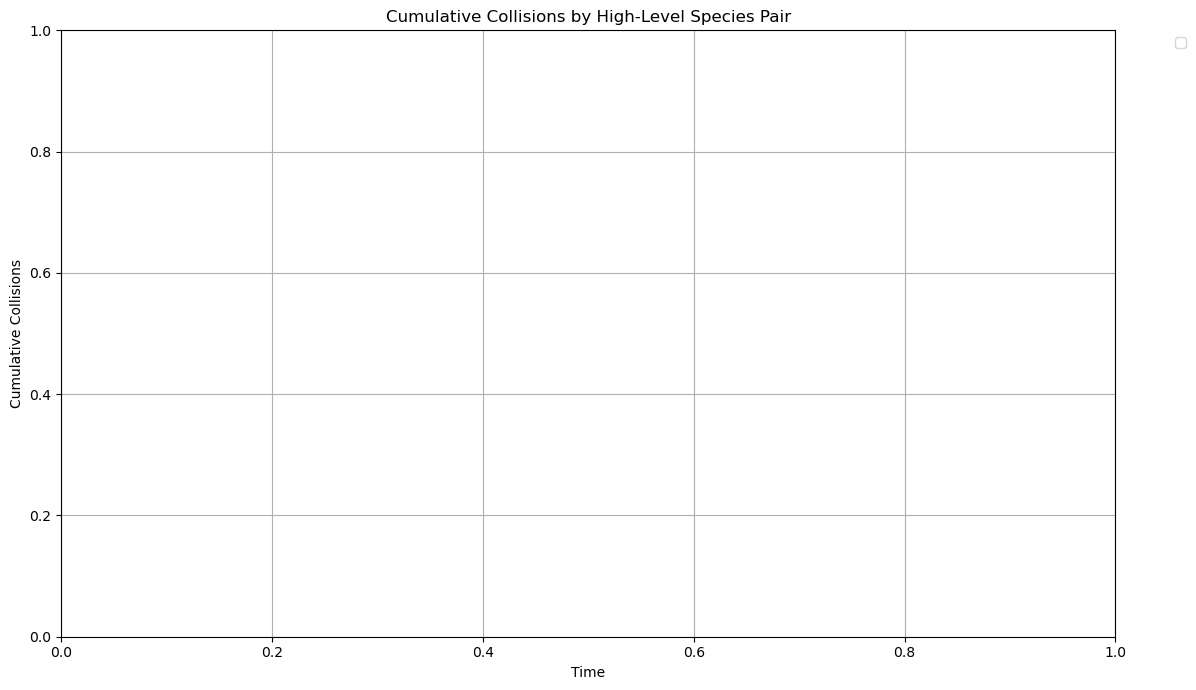

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def strip_subspecies(name):
    return name.split('_')[0]  # e.g., "N_148kg" → "N"

# Step 1: Filter relevant indicators
pairwise_indicators = {
    name: data
    for name, data in scenario_properties.indicator_results['indicators'].items()
    if name.endswith('pair_collisions')
}

# Step 2: Sum collisions grouped by high-level species pairs
collision_sums = defaultdict(lambda: None)
times = None

for name, time_values in pairwise_indicators.items():
    raw_species1, raw_species2 = name.replace('_pair_collisions', '').split('__')
    species1 = strip_subspecies(raw_species1)
    species2 = strip_subspecies(raw_species2)
    
    pair_key = f"{min(species1, species2)}–{max(species1, species2)}"

    if times is None:
        times = np.array(list(time_values.keys()))
    
    matrix = np.array([np.squeeze(values) for values in time_values.values()])
    summed = matrix.sum(axis=1)

    if collision_sums[pair_key] is None:
        collision_sums[pair_key] = summed
    else:
        collision_sums[pair_key] += summed

# Step 3: Plot
plt.figure(figsize=(12, 7))
for pair_key, summed_vals in sorted(collision_sums.items()):
    plt.plot(times, np.cumsum(summed_vals), label=pair_key)

plt.xlabel("Time")
plt.ylabel("Cumulative Collisions")
plt.title("Cumulative Collisions by High-Level Species Pair")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# --- SETTINGS ---
Hmid = scenario_properties.HMid  # Altitude midpoints [n_shells]
start_year = pd.to_datetime(scenario_properties.start_date).year
n_shells = scenario_properties.n_shells

# === FUNCTION TO MAP SUBSPECIES TO GROUPS ===
def map_species_to_group(name):
    if name in large_fragments:
        return 'D'
    if name.startswith('Sns'):
        return 'Sns'
    elif name.startswith('Su'):
        return 'Su'
    elif name.startswith('S'):
        return 'S'
    elif name == 'B':
        return 'B'
    else:
        return 'N'

# --- FILTER PAIRWISE COLLISION INDICATORS ---
pairwise_indicators = {
    name: data
    for name, data in scenario_properties.indicator_results['indicators'].items()
    if name.endswith('pair_collisions')
}

# --- PROCESS COLLISIONS ---
collision_rows = []
for full_name, time_values in pairwise_indicators.items():
    raw_sp1, raw_sp2 = full_name.replace('_pair_collisions', '').split('__')
    sp1 = map_species_to_group(raw_sp1)
    sp2 = map_species_to_group(raw_sp2)

    for t_idx, (year_offset, values) in enumerate(time_values.items()):
        year = int(start_year + year_offset)
        collision_array = np.squeeze(values)  # shape: [n_shells]
        for shell_idx, collision_value in enumerate(collision_array):
            collision_rows.append({
                "Species 1": sp1,
                "Species 2": sp2,
                "Year": year,
                "Altitude": Hmid[shell_idx],
                "Collisions": collision_value
            })

# --- CREATE DATAFRAME ---
df_pairwise_alt = pd.DataFrame(collision_rows)

# --- OPTIONAL: SORT FOR READABILITY ---
df_pairwise_alt = df_pairwise_alt.sort_values(["Species 1", "Species 2", "Year", "Altitude"]).reset_index(drop=True)

# --- SAVE TO CSV ---
output_path = os.path.join(base_path, "pairwise_collisions_time_alt.csv")
df_pairwise_alt.to_csv(output_path, index=False)

print(f"✅ Saved pairwise collision data to {output_path}")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# --- SETTINGS ---
Hmid = scenario_properties.HMid  # Altitude midpoints [n_shells]
start_year = pd.to_datetime(scenario_properties.start_date).year
n_shells = scenario_properties.n_shells

# === FUNCTION TO MAP SUBSPECIES TO GROUPS ===
def map_species_to_group(name):
    if name in large_fragments:
        return 'D'
    if name.startswith('Sns'):
        return 'Sns'
    elif name.startswith('Su'):
        return 'Su'
    elif name.startswith('S'):
        return 'S'
    elif name == 'B':
        return 'B'
    else:
        return 'N'

# --- FILTER PAIRWISE COLLISION INDICATORS ---
pairwise_indicators = {
    name: data
    for name, data in scenario_properties.indicator_results['indicators'].items()
    if name.endswith('pair_collisions')
}

# --- BUILD COLLISION DATAFRAME ---
collision_rows = []
time_series_data = defaultdict(lambda: np.zeros(len(scenario_properties.scen_times)))

for full_name, time_values in pairwise_indicators.items():
    raw_sp1, raw_sp2 = full_name.replace('_pair_collisions', '').split('__')
    sp1 = map_species_to_group(raw_sp1)
    sp2 = map_species_to_group(raw_sp2)

    pair_label = f"{min(sp1, sp2)}–{max(sp1, sp2)}"

    for t_idx, (year_offset, values) in enumerate(time_values.items()):
        year = int(start_year + year_offset)
        collision_array = np.squeeze(values)
        shell_total = collision_array.sum()

        time_series_data[pair_label][t_idx] += shell_total

        for shell_idx, val in enumerate(collision_array):
            collision_rows.append({
                "Species 1": sp1,
                "Species 2": sp2,
                "Year": year,
                "Altitude": Hmid[shell_idx],
                "Collisions": val
            })

# --- SAVE TO CSV ---
df_pairwise_alt = pd.DataFrame(collision_rows)
df_pairwise_alt = df_pairwise_alt.sort_values(["Species 1", "Species 2", "Year", "Altitude"]).reset_index(drop=True)

output_path = os.path.join(base_path, "pairwise_collisions_time_alt.csv")
df_pairwise_alt.to_csv(output_path, index=False)
print(f"✅ Saved pairwise collision data to {output_path}")

# --- PLOT TOTAL COLLISIONS OVER TIME PER PAIR ---
plt.figure(figsize=(12, 6))

times = scenario_properties.scen_times + start_year

for pair_key, vals in sorted(time_series_data.items()):
    plt.plot(times, np.cumsum(vals), label=pair_key)

plt.xlabel("Year")
plt.ylabel("Cumulative Collisions")
plt.title("Cumulative Pairwise Collisions by Grouped Species")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()